# CE-40959: Deep Learning
## HW2 - MLP / Optimization Algorithms /  Batch Normalization / Dropout (Numpy)
(18 points)

### Deadline: 23 Esfand

#### Name: Sadroddin Barikbin
#### Student No.: 98208824

# 1. Imports and Data Loading

In this Notebook, we're going to use the modules you implemented in Part1. We'll define a classification task and train a few models for it.

The dataset we're going to use is called Cifar100. It contains 60000 rgb images (50000 for train and 10000 for test or validation) each with shape (32, 32, 3). Every image has a corresponding label which is a number in range 0 to 99, indicating a class of object. You can see the classes in the picture below.

![title](images/cifar100.gif)

We'll also ask you to compare the results of different models.

** Keep in mind that the accuracy of Random Guess is 1 percent **

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1.1 Imports
Run this cell to import the necessary libraries.

In [0]:
%cd "drive/My Drive/Colab Data"

/content/drive/My Drive/Colab Data


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from model import *
from adam import *
from batch_norm import *
from dense import *
from dropout import *
from module import *
from optimizer import *
from relu import *
from sgd import *
from sigmoid import *
from softmax_crossentropy import *

# we simply download cifar100 using tensorflow.keras library. this library is installed in google colab by default.
from tensorflow.keras.datasets import cifar100

## 1.2 Load the Data
We download the dataset using `cifar100.load_data()` and store the results into (`X_train`, `y_train`), (`X_val`, `y_val`)

In [0]:
(X_train, y_train), (X_val, y_val)= cifar100.load_data()
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

169009152/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


As we are using MLP for image classification, we need to flatten the images. Meaning reshaping the images to single dimension vectors.

In [0]:
X_train = X_train.reshape(50000,32*32*3)# flatten each image in X_train
X_val =  X_val.reshape(10000,32*32*3)# flatten each image in X_val
X_train.shape, X_val.shape

((50000, 3072), (10000, 3072))

We also need the labels to be scalers. We use `np.squeeze()` method to do this.

In [0]:
y_train = np.squeeze(y_train)# squeeze y_train
y_val = np.squeeze(y_val)# squeeze y_val
y_train.shape, y_val.shape

((50000,), (10000,))

 ## 1.3. Normalization
 Run the cell below.

In [0]:
print(X_train.max(), X_train.min())
print(X_val.max(), X_val.min())

255 0
255 0


As you see, rgb values range from 0 to 255. We can devide every value by 255 to normalize the data.

In [0]:
X_train = X_train/255. # devide X_train by 255
X_val = X_val/255. # devide X_val by 255
print(X_train.max(), X_train.min())
print(X_val.max(), X_val.min())

1.0 0.0
1.0 0.0


## 1.4. Plot Function
This function get a history of training (loss, acc, val_loss, val_acc) as input and plots it.

In [0]:
def plot_history(history):
    losses, accs, val_losses, val_accs = history
    x = [i for i in range(len(losses))]
    
    # plot for losses
    plt.plot(x, losses, '-g', label='train')
    plt.plot(x, val_losses, '-r', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
    # plot for accuracies
    plt.plot(x, accs, '-g', label='train')
    plt.plot(x, val_accs, '-r', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='upper left')
    plt.show()

# 2. Problem: Learning Rate (5 points)
In this problem, We are going to see the effect of the `learning_rate` of `Adam` optimizer. We use the same model in the different sections of this problem. The only thing that is different, is the `learning_rate`.

We use `beta1 = 0.9`, `beta2 = 0.999` and `epsilon = 1e-8` for `Adam`.
The model contains a `Dense` layer with 100 neurones, followed by a `BatchNormalization` and a `ReLU` activation function. After that, we put another `Dense` layer with 100 neurones to output the probability of each class, followed by a `SoftmaxCrossentropy` module.

We train each model for 10 epochs and `batch_size = 1024`. We also plot the history of training.

**Note that you should assign a unique name for every module you define in your model.**

You can use `model.add(Module)` to add a module to the model. The modules are added in order.
It's also recommended to read the `model.py` file.

## 2.1. `learning_rate = 0.001`

Epoch 1: loss = 13.7701, acc = 0.0251, val_loss = 8.2156, val_acc = 0.0319
Epoch 2: loss = 5.6659, acc = 0.0485, val_loss = 5.2223, val_acc = 0.0537
Epoch 3: loss = 4.7641, acc = 0.0641, val_loss = 4.6428, val_acc = 0.0669
Epoch 4: loss = 4.4447, acc = 0.0784, val_loss = 4.4491, val_acc = 0.0745
Epoch 5: loss = 4.2921, acc = 0.0858, val_loss = 4.2742, val_acc = 0.0869
Epoch 6: loss = 4.1768, acc = 0.0971, val_loss = 4.2224, val_acc = 0.0942
Epoch 7: loss = 4.1131, acc = 0.1027, val_loss = 4.1536, val_acc = 0.1015
Epoch 8: loss = 4.0398, acc = 0.1101, val_loss = 4.1134, val_acc = 0.1070
Epoch 9: loss = 3.9992, acc = 0.1144, val_loss = 4.0994, val_acc = 0.1022
Epoch 10: loss = 3.9730, acc = 0.1141, val_loss = 4.0576, val_acc = 0.1075


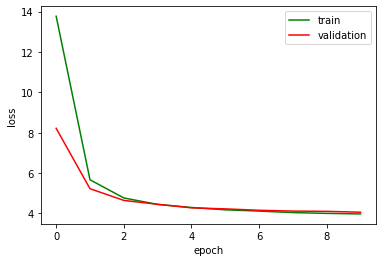

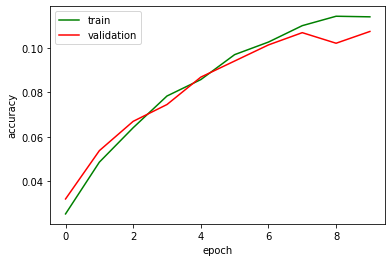

In [0]:
model = Model(Adam(learning_rate=1e-3, beta1=.9, beta2=.999))
# add the layers to the model
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(ReLU("R"))optimizer.zero_grad()
        losses.backward()
        optimizer.step()  
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.2. `learning_rate = 0.01`

Epoch 1: loss = 5.9708, acc = 0.0461, val_loss = 4.2100, val_acc = 0.0727
Epoch 2: loss = 3.9689, acc = 0.1031, val_loss = 3.9183, val_acc = 0.1094
Epoch 3: loss = 3.7752, acc = 0.1311, val_loss = 3.7599, val_acc = 0.1392
Epoch 4: loss = 3.6621, acc = 0.1518, val_loss = 3.8136, val_acc = 0.1323
Epoch 5: loss = 3.5974, acc = 0.1633, val_loss = 3.6975, val_acc = 0.1471
Epoch 6: loss = 3.5393, acc = 0.1709, val_loss = 3.6502, val_acc = 0.1642
Epoch 7: loss = 3.4963, acc = 0.1834, val_loss = 3.6231, val_acc = 0.1554
Epoch 8: loss = 3.4545, acc = 0.1899, val_loss = 3.6366, val_acc = 0.1589
Epoch 9: loss = 3.4161, acc = 0.1953, val_loss = 3.5390, val_acc = 0.1765
Epoch 10: loss = 3.3902, acc = 0.1977, val_loss = 3.5897, val_acc = 0.1772


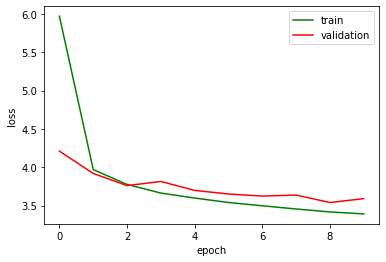

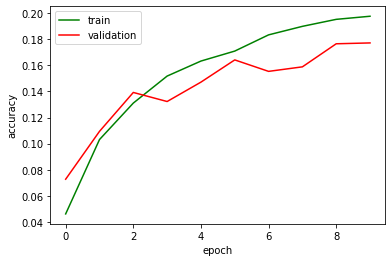

In [0]:
model = Model(Adam(learning_rate=1e-2, beta1=.9, beta2=.999))
# add the layers to the model
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(ReLU("R"))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.3. `learning_rate = 0.1`

Epoch 1: loss = 6.0587, acc = 0.0165, val_loss = 4.6592, val_acc = 0.0238
Epoch 2: loss = 4.4157, acc = 0.0284, val_loss = 4.3093, val_acc = 0.0358
Epoch 3: loss = 4.2716, acc = 0.0432, val_loss = 4.2941, val_acc = 0.0381
Epoch 4: loss = 4.2415, acc = 0.0439, val_loss = 4.2840, val_acc = 0.0422
Epoch 5: loss = 4.2150, acc = 0.0477, val_loss = 4.2218, val_acc = 0.0401
Epoch 6: loss = 4.1868, acc = 0.0497, val_loss = 4.2764, val_acc = 0.0443
Epoch 7: loss = 4.1522, acc = 0.0540, val_loss = 4.1384, val_acc = 0.0616
Epoch 8: loss = 4.1387, acc = 0.0557, val_loss = 4.1592, val_acc = 0.0560
Epoch 9: loss = 4.1277, acc = 0.0572, val_loss = 4.1402, val_acc = 0.0658
Epoch 10: loss = 4.1050, acc = 0.0599, val_loss = 4.1451, val_acc = 0.0553


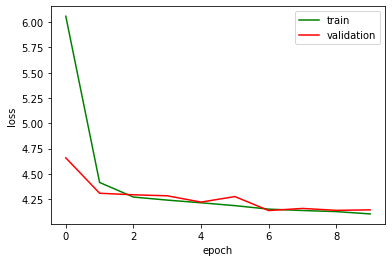

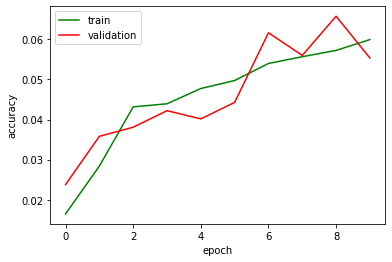

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(ReLU("R"))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.4. `learning_rate = 1`

Epoch 1: loss = 14.5879, acc = 0.0104, val_loss = 5.3513, val_acc = 0.0086
Epoch 2: loss = 4.8265, acc = 0.0101, val_loss = 4.6900, val_acc = 0.0082
Epoch 3: loss = 4.6783, acc = 0.0103, val_loss = 4.6682, val_acc = 0.0099
Epoch 4: loss = 4.6666, acc = 0.0103, val_loss = 4.6515, val_acc = 0.0091
Epoch 5: loss = 4.6658, acc = 0.0106, val_loss = 4.6777, val_acc = 0.0089
Epoch 6: loss = 4.6680, acc = 0.0096, val_loss = 4.6687, val_acc = 0.0094
Epoch 7: loss = 4.6679, acc = 0.0093, val_loss = 4.6560, val_acc = 0.0120
Epoch 8: loss = 4.6647, acc = 0.0100, val_loss = 4.6525, val_acc = 0.0099
Epoch 9: loss = 4.6602, acc = 0.0093, val_loss = 4.6513, val_acc = 0.0092
Epoch 10: loss = 4.6646, acc = 0.0097, val_loss = 4.6895, val_acc = 0.0097


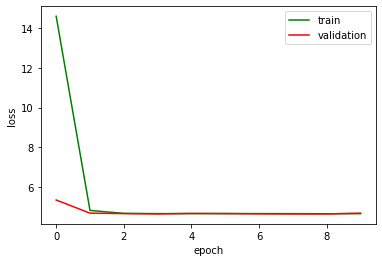

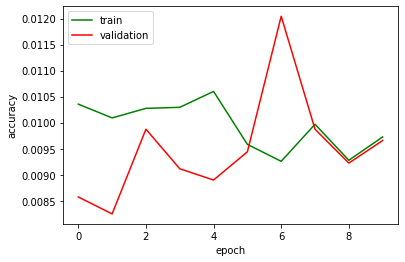

In [0]:
model = Model(Adam(learning_rate=1, beta1=.9, beta2=.999))
# add the layers to the model
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(ReLU("R"))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)

## 2.5. Compare the Results
** Compare the results of the models above. Which Learning Rate worked best? Why? (Feel free to write in Persian) **

On one way very low LR slows learning and on the other way very high LR makes learning params oscillate around optimum.
I thought LR=0.1 would do the best but LR=0.01 actually did so.

# 3. Problem: Optimizers & Batch Normalization (5 points)
In this problem, We are going to try different optimizers with or without `BatchNormalization`. Except for optimizer and `BatchNormalization`, the other parts of the models in differenct sections are the same.

We use `learning_rate = 0.1`, `beta1 = 0.9`, `beta2 = 0.999`, `epsilon = 1e-8` for `Adam` and `learning_rate = 0.1`, `momentum = 0.9` for SGD.


The model contains a `Dense` layer with 100 neurones, followed by a `Sigmoid` activation function. After that, we put another `Dense` layer with 100 neurones to output the probability of each class, followed by a `SoftmaxCrossentropy` module.

In some models, we add a `BatchNormalization` after the first `Dense` module.

We train each model for 50 epochs and `batch_size = 1024`. We also plot the history of training.

## 3.1. SGD & No BatchNorm

Epoch 1: loss = 7.9033, acc = 0.0120, val_loss = 5.0143, val_acc = 0.0124
Epoch 2: loss = 4.7710, acc = 0.0120, val_loss = 4.6885, val_acc = 0.0125
Epoch 3: loss = 4.6784, acc = 0.0112, val_loss = 4.6528, val_acc = 0.0109
Epoch 4: loss = 4.6548, acc = 0.0130, val_loss = 4.6526, val_acc = 0.0098
Epoch 5: loss = 4.6447, acc = 0.0139, val_loss = 4.6350, val_acc = 0.0141
Epoch 6: loss = 4.6358, acc = 0.0144, val_loss = 4.6386, val_acc = 0.0132
Epoch 7: loss = 4.6311, acc = 0.0142, val_loss = 4.6249, val_acc = 0.0166
Epoch 8: loss = 4.6185, acc = 0.0176, val_loss = 4.6199, val_acc = 0.0189
Epoch 9: loss = 4.6062, acc = 0.0182, val_loss = 4.6163, val_acc = 0.0133
Epoch 10: loss = 4.6037, acc = 0.0183, val_loss = 4.6043, val_acc = 0.0139
Epoch 11: loss = 4.5948, acc = 0.0173, val_loss = 4.5999, val_acc = 0.0182
Epoch 12: loss = 4.5825, acc = 0.0186, val_loss = 4.5778, val_acc = 0.0199
Epoch 13: loss = 4.5678, acc = 0.0185, val_loss = 4.5734, val_acc = 0.0191
Epoch 14: loss = 4.5619, acc = 0.0

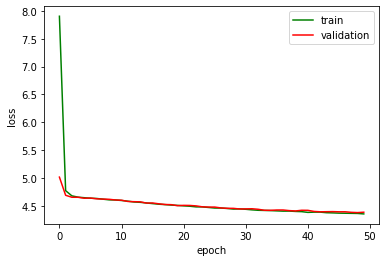

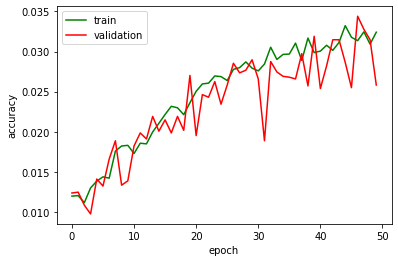

In [0]:
model = Model(SGD(learning_rate=1e-1, momentum=.9))
# add the layers to the model
model.add(Dense("D1",32*32*3,100))
model.add(Sigmoid("Si"))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

## 3.2. SGD & BatchNorm

Epoch 1: loss = 6.8045, acc = 0.0137, val_loss = 4.9189, val_acc = 0.0182
Epoch 2: loss = 4.6517, acc = 0.0226, val_loss = 4.5609, val_acc = 0.0237
Epoch 3: loss = 4.5214, acc = 0.0261, val_loss = 4.4945, val_acc = 0.0295
Epoch 4: loss = 4.4793, acc = 0.0322, val_loss = 4.4807, val_acc = 0.0270
Epoch 5: loss = 4.4543, acc = 0.0363, val_loss = 4.4521, val_acc = 0.0339
Epoch 6: loss = 4.4261, acc = 0.0394, val_loss = 4.4214, val_acc = 0.0385
Epoch 7: loss = 4.4034, acc = 0.0436, val_loss = 4.3985, val_acc = 0.0435
Epoch 8: loss = 4.3803, acc = 0.0459, val_loss = 4.3708, val_acc = 0.0426
Epoch 9: loss = 4.3535, acc = 0.0507, val_loss = 4.3456, val_acc = 0.0500
Epoch 10: loss = 4.3289, acc = 0.0546, val_loss = 4.3268, val_acc = 0.0535
Epoch 11: loss = 4.3078, acc = 0.0540, val_loss = 4.3007, val_acc = 0.0554
Epoch 12: loss = 4.2813, acc = 0.0592, val_loss = 4.2754, val_acc = 0.0589
Epoch 13: loss = 4.2578, acc = 0.0616, val_loss = 4.2607, val_acc = 0.0630
Epoch 14: loss = 4.2402, acc = 0.0

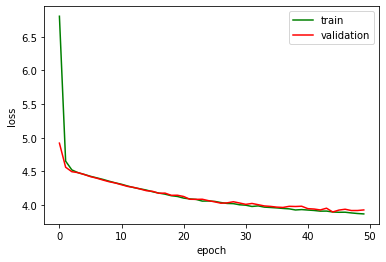

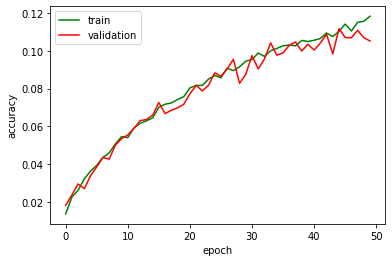

In [0]:
model = Model(SGD(learning_rate=1e-1, momentum=.9))
# add the layers to the model. don't forget to add a BatchNormalization module right after the first Dense module.
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

## 3.3. Adam & BatchNorm

Epoch 1: loss = 9.1570, acc = 0.0127, val_loss = 4.6264, val_acc = 0.0106
Epoch 2: loss = 4.5513, acc = 0.0186, val_loss = 4.4866, val_acc = 0.0282
Epoch 3: loss = 4.4050, acc = 0.0277, val_loss = 4.3730, val_acc = 0.0244
Epoch 4: loss = 4.3224, acc = 0.0362, val_loss = 4.3103, val_acc = 0.0414
Epoch 5: loss = 4.2325, acc = 0.0481, val_loss = 4.2714, val_acc = 0.0495
Epoch 6: loss = 4.1434, acc = 0.0583, val_loss = 4.1466, val_acc = 0.0645
Epoch 7: loss = 4.0615, acc = 0.0677, val_loss = 4.0321, val_acc = 0.0740
Epoch 8: loss = 3.9589, acc = 0.0797, val_loss = 3.9878, val_acc = 0.0840
Epoch 9: loss = 3.9066, acc = 0.0913, val_loss = 3.9262, val_acc = 0.0970
Epoch 10: loss = 3.8844, acc = 0.0922, val_loss = 3.8988, val_acc = 0.0927
Epoch 11: loss = 3.8566, acc = 0.0948, val_loss = 3.9012, val_acc = 0.0956
Epoch 12: loss = 3.8496, acc = 0.0982, val_loss = 3.9272, val_acc = 0.0868
Epoch 13: loss = 3.8417, acc = 0.1002, val_loss = 3.9030, val_acc = 0.0954
Epoch 14: loss = 3.8250, acc = 0.1

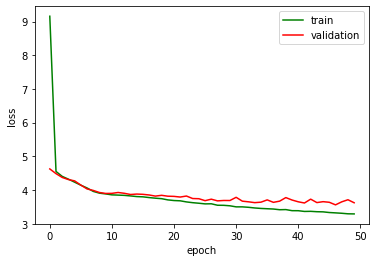

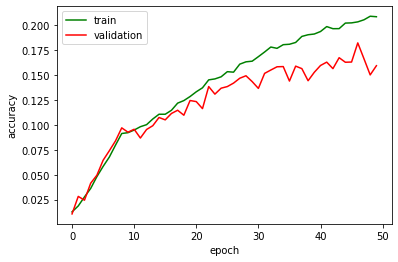

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to add a BatchNormalization module right after the first Dense module.
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

## 3.4. Compare the Results
** Compare the results of the models above. **

*Adding BatchNorm to SGD not only gained better final accuracy but also it seems reduced the gap between train&valid accuracies throughout learning in comparison with Batchnorm-less SGD.

*Adam with BatchNorm gets higher acc in the same time with respect to SGD+BN.

# 4. Problem: Regularization (8 points)
Take another look at the results of 3.3. You should be able to see a significant gap between `acc` and `val_acc`. In this problem, We try to reduce the overfitting and make the model generalize better.

## 4.1. L2 Regularization

`L2 Regularization` restricts the scale of the weights of a `Dense` module and Reduces the complexity of the model.

The `Dense` module you implemented, takes a `l2_coef` argument as input. In this problem, we try different values for `l2_coef`.

The optimizers and the models' structure is the same as in 3.3.

We train each model for 50 epochs and `batch_size = 1024`. We also plot the history of training.

### 4.1.1. `l2_coef = 1e-2`

Epoch 1: loss = 5.7894, acc = 0.0182, val_loss = 4.6087, val_acc = 0.0170
Epoch 2: loss = 4.5138, acc = 0.0314, val_loss = 4.6378, val_acc = 0.0246
Epoch 3: loss = 4.4801, acc = 0.0344, val_loss = 4.5968, val_acc = 0.0244
Epoch 4: loss = 4.4751, acc = 0.0332, val_loss = 4.6290, val_acc = 0.0160
Epoch 5: loss = 4.4567, acc = 0.0349, val_loss = 4.6247, val_acc = 0.0149
Epoch 6: loss = 4.4648, acc = 0.0339, val_loss = 4.6337, val_acc = 0.0171
Epoch 7: loss = 4.4549, acc = 0.0359, val_loss = 4.6185, val_acc = 0.0238
Epoch 8: loss = 4.4523, acc = 0.0346, val_loss = 4.6899, val_acc = 0.0110
Epoch 9: loss = 4.4542, acc = 0.0364, val_loss = 4.6043, val_acc = 0.0171
Epoch 10: loss = 4.4431, acc = 0.0371, val_loss = 4.6823, val_acc = 0.0122
Epoch 11: loss = 4.4504, acc = 0.0350, val_loss = 4.5546, val_acc = 0.0222
Epoch 12: loss = 4.4397, acc = 0.0367, val_loss = 4.6256, val_acc = 0.0163
Epoch 13: loss = 4.4468, acc = 0.0368, val_loss = 4.6135, val_acc = 0.0155
Epoch 14: loss = 4.4400, acc = 0.0

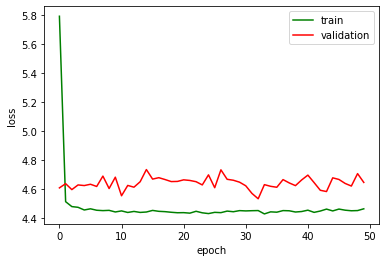

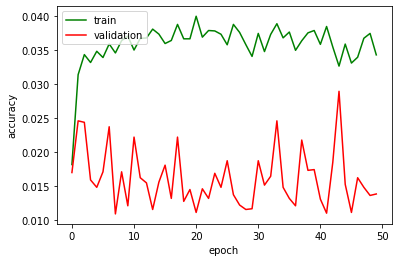

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
model.add(Dense("D1",32*32*3,100,l2_coef=1e-2))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dense("D2",100,100,l2_coef=1e-2))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.2. `l2_coef = 1e-3`

Epoch 1: loss = 7.5440, acc = 0.0164, val_loss = 4.7637, val_acc = 0.0219
Epoch 2: loss = 4.4594, acc = 0.0319, val_loss = 4.6383, val_acc = 0.0174
Epoch 3: loss = 4.3719, acc = 0.0425, val_loss = 4.9635, val_acc = 0.0178
Epoch 4: loss = 4.3112, acc = 0.0449, val_loss = 4.5641, val_acc = 0.0196
Epoch 5: loss = 4.2554, acc = 0.0532, val_loss = 4.7133, val_acc = 0.0129
Epoch 6: loss = 4.2630, acc = 0.0524, val_loss = 4.5258, val_acc = 0.0278
Epoch 7: loss = 4.2374, acc = 0.0550, val_loss = 4.6039, val_acc = 0.0244
Epoch 8: loss = 4.2449, acc = 0.0516, val_loss = 4.5731, val_acc = 0.0322
Epoch 9: loss = 4.2204, acc = 0.0579, val_loss = 4.4887, val_acc = 0.0303
Epoch 10: loss = 4.2023, acc = 0.0590, val_loss = 4.5663, val_acc = 0.0310
Epoch 11: loss = 4.1982, acc = 0.0606, val_loss = 4.5946, val_acc = 0.0322
Epoch 12: loss = 4.2029, acc = 0.0607, val_loss = 4.7594, val_acc = 0.0259
Epoch 13: loss = 4.2037, acc = 0.0591, val_loss = 4.7092, val_acc = 0.0158
Epoch 14: loss = 4.2002, acc = 0.0

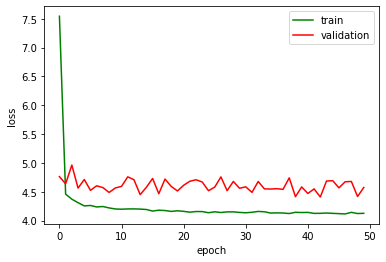

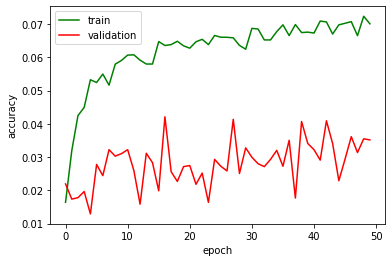

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
model.add(Dense("D1",32*32*3,100,l2_coef=1e-3))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dense("D2",100,100,l2_coef=1e-3))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.3. `l2_coef = 1e-4`

Epoch 1: loss = 8.5702, acc = 0.0167, val_loss = 4.6689, val_acc = 0.0177
Epoch 2: loss = 4.3998, acc = 0.0330, val_loss = 5.2473, val_acc = 0.0182
Epoch 3: loss = 4.2523, acc = 0.0418, val_loss = 4.5016, val_acc = 0.0273
Epoch 4: loss = 4.2050, acc = 0.0489, val_loss = 4.6253, val_acc = 0.0207
Epoch 5: loss = 4.1656, acc = 0.0545, val_loss = 4.5861, val_acc = 0.0321
Epoch 6: loss = 4.1292, acc = 0.0569, val_loss = 4.5619, val_acc = 0.0310
Epoch 7: loss = 4.1221, acc = 0.0569, val_loss = 4.8740, val_acc = 0.0254
Epoch 8: loss = 4.0993, acc = 0.0658, val_loss = 4.3597, val_acc = 0.0422
Epoch 9: loss = 4.0641, acc = 0.0724, val_loss = 4.4959, val_acc = 0.0418
Epoch 10: loss = 4.0434, acc = 0.0724, val_loss = 4.2740, val_acc = 0.0449
Epoch 11: loss = 4.0062, acc = 0.0773, val_loss = 4.3501, val_acc = 0.0397
Epoch 12: loss = 3.9834, acc = 0.0809, val_loss = 4.4903, val_acc = 0.0416
Epoch 13: loss = 3.9533, acc = 0.0881, val_loss = 4.4281, val_acc = 0.0492
Epoch 14: loss = 3.9316, acc = 0.0

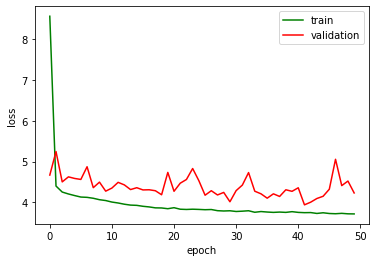

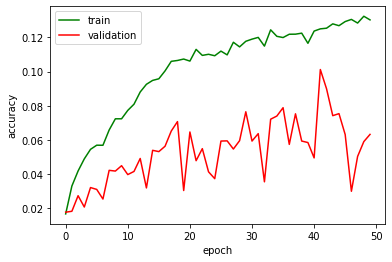

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
model.add(Dense("D1",32*32*3,100,l2_coef=1e-4))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dense("D2",100,100,l2_coef=1e-4))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.4. `l2_coef = 1e-5`

Epoch 1: loss = 7.7970, acc = 0.0125, val_loss = 5.1811, val_acc = 0.0133
Epoch 2: loss = 4.5536, acc = 0.0249, val_loss = 5.5433, val_acc = 0.0162
Epoch 3: loss = 4.3488, acc = 0.0416, val_loss = 6.0484, val_acc = 0.0224
Epoch 4: loss = 4.1371, acc = 0.0633, val_loss = 4.3828, val_acc = 0.0336
Epoch 5: loss = 4.0187, acc = 0.0760, val_loss = 4.8436, val_acc = 0.0463
Epoch 6: loss = 3.9545, acc = 0.0858, val_loss = 4.8126, val_acc = 0.0509
Epoch 7: loss = 3.9078, acc = 0.0940, val_loss = 4.4744, val_acc = 0.0663
Epoch 8: loss = 3.8724, acc = 0.0986, val_loss = 4.5366, val_acc = 0.0654
Epoch 9: loss = 3.8404, acc = 0.1027, val_loss = 4.2656, val_acc = 0.0782
Epoch 10: loss = 3.7843, acc = 0.1130, val_loss = 4.6200, val_acc = 0.0662
Epoch 11: loss = 3.7549, acc = 0.1196, val_loss = 4.7600, val_acc = 0.0635
Epoch 12: loss = 3.7176, acc = 0.1270, val_loss = 4.5434, val_acc = 0.0633
Epoch 13: loss = 3.7108, acc = 0.1270, val_loss = 4.8029, val_acc = 0.0539
Epoch 14: loss = 3.6821, acc = 0.1

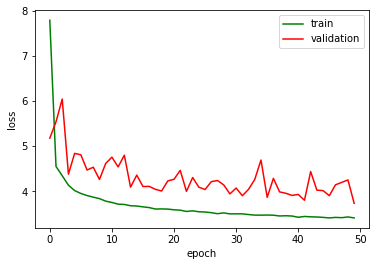

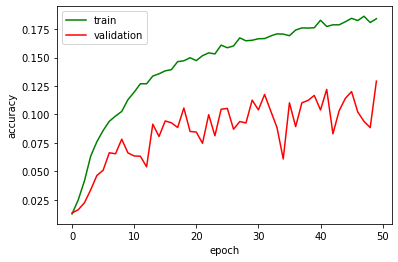

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model. don't forget to set l2_coef for both Dense modules.
model.add(Dense("D1",32*32*3,100,l2_coef=1e-5))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dense("D2",100,100,l2_coef=1e-5))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.1.5 Compare the Results
** Compare the results of the models above. **

-The lower the l2_coef,the better the model performance even in the validation

-I did expect reducing gap between train & val acc by increasing l2_coeff but it did not happen.

-In higher l2_coeffs val acc is just oscillating and this is not what it was supposed to be as well.

## 4.2. Dropout
A more common regularization method is `Dropout`. In this problem, we try different values for `keep_prob` for `Dropout` module and compare the results.

The optimizers and the models' structure is the same as in 3.3. The only difference is we add a `Dropout` module right after `Sigmoid` activation.

We train each model for 50 epochs and `batch_size = 1024`. We also plot the history of training.

### 4.2.1. `keep_prob = 0.3`

Epoch 1: loss = 6.8934, acc = 0.0101, val_loss = 4.6192, val_acc = 0.0106
Epoch 2: loss = 4.6153, acc = 0.0118, val_loss = 4.6039, val_acc = 0.0122
Epoch 3: loss = 4.5889, acc = 0.0167, val_loss = 4.5389, val_acc = 0.0231
Epoch 4: loss = 4.5345, acc = 0.0224, val_loss = 4.3858, val_acc = 0.0390
Epoch 5: loss = 4.4817, acc = 0.0278, val_loss = 4.3302, val_acc = 0.0467
Epoch 6: loss = 4.4342, acc = 0.0295, val_loss = 4.2421, val_acc = 0.0614
Epoch 7: loss = 4.4022, acc = 0.0332, val_loss = 4.2293, val_acc = 0.0559
Epoch 8: loss = 4.3733, acc = 0.0349, val_loss = 4.1664, val_acc = 0.0656
Epoch 9: loss = 4.3551, acc = 0.0372, val_loss = 4.1828, val_acc = 0.0732
Epoch 10: loss = 4.3178, acc = 0.0407, val_loss = 4.1057, val_acc = 0.0770
Epoch 11: loss = 4.3050, acc = 0.0425, val_loss = 4.0840, val_acc = 0.0821
Epoch 12: loss = 4.2812, acc = 0.0454, val_loss = 4.0592, val_acc = 0.0892
Epoch 13: loss = 4.2633, acc = 0.0472, val_loss = 4.0549, val_acc = 0.0904
Epoch 14: loss = 4.2516, acc = 0.0

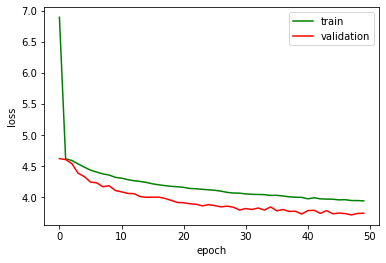

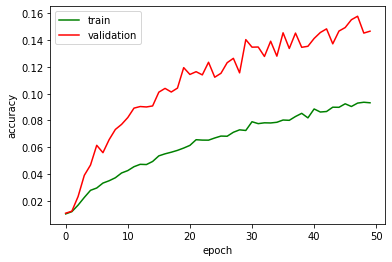

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model.
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dropout("D",keep_prob=0.3))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.2.2. `keep_prob = 0.5`

Epoch 1: loss = 6.6899, acc = 0.0111, val_loss = 4.6147, val_acc = 0.0138
Epoch 2: loss = 4.5641, acc = 0.0175, val_loss = 4.4475, val_acc = 0.0296
Epoch 3: loss = 4.4769, acc = 0.0249, val_loss = 4.3088, val_acc = 0.0509
Epoch 4: loss = 4.4076, acc = 0.0343, val_loss = 4.2372, val_acc = 0.0528
Epoch 5: loss = 4.3505, acc = 0.0394, val_loss = 4.1126, val_acc = 0.0752
Epoch 6: loss = 4.2971, acc = 0.0440, val_loss = 4.1088, val_acc = 0.0732
Epoch 7: loss = 4.2517, acc = 0.0484, val_loss = 4.0424, val_acc = 0.0825
Epoch 8: loss = 4.2192, acc = 0.0540, val_loss = 4.0487, val_acc = 0.0895
Epoch 9: loss = 4.1806, acc = 0.0568, val_loss = 3.9529, val_acc = 0.0944
Epoch 10: loss = 4.1533, acc = 0.0621, val_loss = 3.9601, val_acc = 0.1060
Epoch 11: loss = 4.1244, acc = 0.0669, val_loss = 3.9578, val_acc = 0.0952
Epoch 12: loss = 4.1135, acc = 0.0672, val_loss = 3.9218, val_acc = 0.1032
Epoch 13: loss = 4.0854, acc = 0.0709, val_loss = 3.8929, val_acc = 0.1143
Epoch 14: loss = 4.0715, acc = 0.0

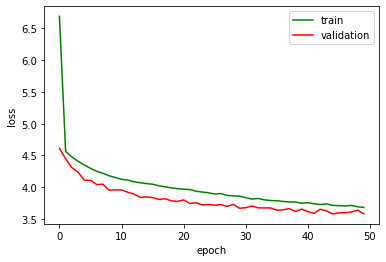

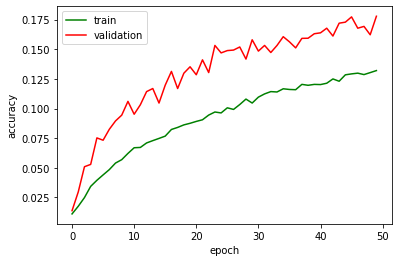

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model.
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dropout("D",keep_prob=0.5))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.2.3. `keep_prob = 0.7`

Epoch 1: loss = 7.4428, acc = 0.0137, val_loss = 4.5523, val_acc = 0.0277
Epoch 2: loss = 4.4937, acc = 0.0264, val_loss = 4.3830, val_acc = 0.0346
Epoch 3: loss = 4.3795, acc = 0.0390, val_loss = 4.3079, val_acc = 0.0615
Epoch 4: loss = 4.2839, acc = 0.0487, val_loss = 4.1420, val_acc = 0.0705
Epoch 5: loss = 4.2302, acc = 0.0559, val_loss = 4.0874, val_acc = 0.0790
Epoch 6: loss = 4.1688, acc = 0.0630, val_loss = 4.0533, val_acc = 0.0856
Epoch 7: loss = 4.1063, acc = 0.0689, val_loss = 3.9692, val_acc = 0.0852
Epoch 8: loss = 4.0655, acc = 0.0733, val_loss = 3.9248, val_acc = 0.0986
Epoch 9: loss = 4.0276, acc = 0.0797, val_loss = 3.8632, val_acc = 0.1114
Epoch 10: loss = 3.9841, acc = 0.0839, val_loss = 3.8862, val_acc = 0.1061
Epoch 11: loss = 3.9721, acc = 0.0873, val_loss = 3.8057, val_acc = 0.1268
Epoch 12: loss = 3.9472, acc = 0.0917, val_loss = 3.8005, val_acc = 0.1213
Epoch 13: loss = 3.9123, acc = 0.0955, val_loss = 3.7584, val_acc = 0.1334
Epoch 14: loss = 3.8950, acc = 0.0

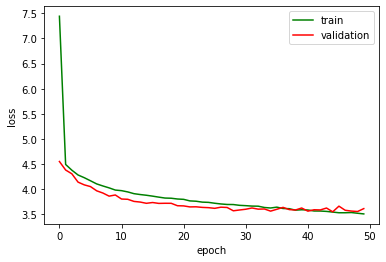

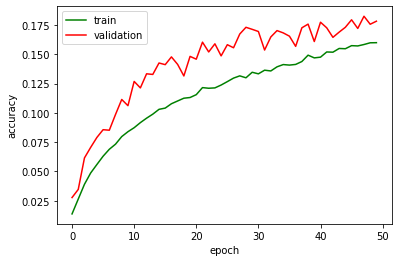

In [0]:
model = Model(Adam(learning_rate=1e-1, beta1=.9, beta2=.999))
# add the layers to the model.
model.add(Dense("D1",32*32*3,100))
model.add(BatchNormalization("B",100))
model.add(Sigmoid("Si"))
model.add(Dropout("D",keep_prob=0.7))
model.add(Dense("D2",100,100))
model.add(SoftmaxCrossentropy("S"))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=50)
plot_history(history)

### 4.2.4. Compare the Results
** Compare the results of the models above. **

By increasing keep_prob to 0.7 the gap between train & val acc decreases.

## 4.3. Compare L2 Regularization and Dropout
** Which one of the L2 Regularization and Dropout worked better? **

Dropout actually worked better.